<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/p600_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%9D%B4%EC%83%81%EC%B9%98(Outlier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://adioshun.gitbooks.io/data-analytics-with-r/content/data-preparation.html  


### 【데이터 전처리】

- 데이터 전처리(Data Preprocessing)란 수행하고자 하는 분석에 적합하게 데이터를 가공하는 작업을 의미한다.  
- 결측값이나 이상치가 존재하거나, 분석 도구에 적합하지 않을 정도로 많은 변수는 분석 결과의 품질을 떨어 뜨린다. 이를 방지하기 위해 분석을 수행하기 전에 전 데이터 전처리 과정을 수행한다.
- 데이터 전처리 종류
1. 데이터 클리닝(Cleaning)  
    - 결측치 처리
    - 이상치(Outlier) 확인 및 정제


2. 데이터 통합(Integration)
    - 다양한 로그 파일 및 데이터베이스의 통합
    - 일관성 있는 데이터 형태로 변환


3. 데이터 변환(Transformation)
    -  스케일링(scaling) - 표준화(Standardization)와 정규화(Normalization)
    -  요약(summarization)
    -  계층 생성


4. 데이터 축소(Reduction)
    – 축소된 데이터도 원래 데이터와 같은 분석 결과를 얻을 수 있어야 함.
    – 컴퓨팅 시간 등 고려 위해 데이터 축소가 필요
    – 방대한 로그 데이터의 경우 일정 시간 단위로 데이터 축소 필요
5. 데이터 이산화(Discretization)
    – 데이터 축소의 일종이나 중요시 됨
    – 수치 값을 속성 값으로 변환
      예) [0~0.5) : Low, [0.5~1.0] : High
    – 많은 알고리즘은 데이터 이산화 과정이 요구됨
6. 데이터 표현 특징 추출(Descriptive Characteristics Mining)
    – 데이터를 더 잘 이해하기 위해 대표 특징을 이해하는 과정
    – 데이터 축소의 일종이기도 함
    – 실제 도메인을 고려한 방법이 많이 사용됨
      예) 가속도 센서: 가속도 특성에 따른 연산 필요
      예) GPS 센서: GPS 데이터 특성에 따른 연산 필요
7. 불균형 데이터 처리(imbalanced data ) - 언더 샘플링, 오버 샘플링
8. 데이터 분할(Splitting Data)- train, test데이터 분할
 


### 【이상치(Outlier)】
- 이상치(Outlier)란, 보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값을 말한다. 
- 어떤 의사결정을 하는데 필요한 데이터를 분석 혹은 모델링할 경우, 이러한 이상치가 의사결정에 큰 영향을 미칠 수 있기 때문에 데이터 전처리 과정에서의 적절한 이상치 처리는 필수적이다.
-  하지만 앞서 말한 ‘데이터의 범위에서 많이 벗어난’ 혹은 ‘아주 작은/큰’이라는 것은 정확히 어떤 기준으로 판단할 수 있을까?
- 데이터에서 이상치를 탐지하기 위한 방법  
 (1)표준편차(Standard Deviation)  
 (2) IQR(Interquartile Range) with Box plots  
 (3) Isolation Forest  
 (4) DBScan(Density Based Spatial Clustering of Applications with Noise)  



 https://gannigoing.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B4%EC%83%81%EC%B9%98-outlier-%EC%9D%98-%EA%B8%B0%EC%A4%80%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C-f11f60bf901a


#### 이상치 확인

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#k=array(m)
m = [1,2,3,4,5,6,7,8,9,10,20]
#m=[24,28,37,43,47,59,67,75,77]
#m=[1,2,2,3,4,4,5,5,6,6,7,9]

pd.DataFrame(m).describe()

,0
count,11.000000
mean,6.818182
std,5.231026
min,1.000000
25%,3.500000
50%,6.000000
75%,8.500000
max,20.000000


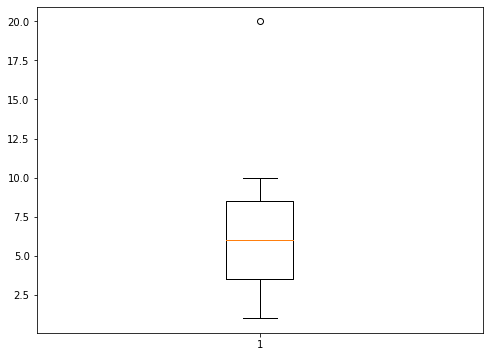

In [ ]:
fig = plt.figure(figsize=(8,6))

m = [1,2,3,4,5,6,7,8,9,10,20]
plt.boxplot(m)
plt.show()

<function twinx at 0x7f876e38f430>


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


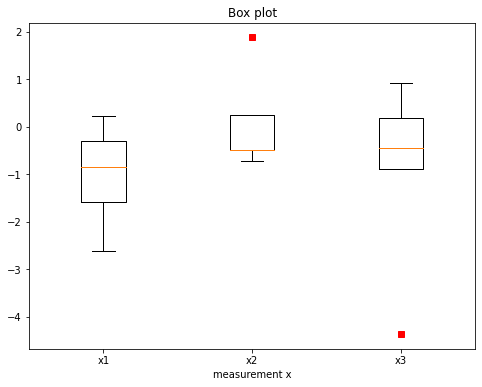

In [ ]:
x1 = [-0.46,-1.25,-2.62,0.22]
x2 = [0.24,1.88,-0.49,-0.73,-0.49]
x3 = [-0.44,0.93,0.19,-4.36,-0.88]

fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in [x1, x2, x3]], 0, 'rs', 1)
print(plt.twinx)
plt.xticks([y+1 for y in range(len([x1, x2, x3]))], ['x1', 'x2', 'x3'])
plt.xlabel('measurement x')
t = plt.title('Box plot')
plt.show()

In [ ]:
m = [1,2,3,4,5,6,7,8,9,10,20]
#m=[24,28,37,43,47,59,67,75,77]
#m=[1,2,2,3,4,4,5,5,6,6,7,9]
q1 =np.percentile(m,25)
q2 = np.percentile(m,50)
q3=np.percentile(m,75)
irq=q3-q1

print('Q1:',q1)
print('Q2:', q2)
print('Q3:',q3)
print('IRQ :',irq)
print('MIN:', q1-1.5*irq)  #1.5가 디폴트값. 바꿀 수 있음
print('MAX:', q3+1.5*irq)

Q1: 3.5
Q2: 6.0
Q3: 8.5
IRQ : 5.0
MIN: -4.0
MAX: 16.0


**wine 데이터 세트의 'color_intensity'컬럼에서 IQR 방식으로 이상치 검색**

In [ ]:
# 데이터 가져오기
from sklearn.datasets import load_wine

wine_load = load_wine()
print(dir(wine_load))
print(wine_load.feature_names)
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)

wine['class'] = wine_load.target
print(wine['class'].unique())
wine['class'] = wine['class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
wine


['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


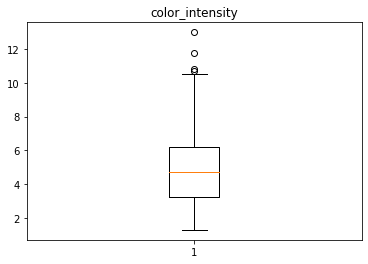

In [ ]:
# 앞의 Box Plot을 그려 데이터의 이상치 확인
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [ ]:
# 앞의 Box Plot을 그려 데이터의 이상치를 함수로 만들어 이상치의 위치와 값을 확인
def outliers_iqr(dt, col):
  quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
  iqr = quartile_3 - quartile_1
  lower_whis = quartile_1 - (iqr * 1.5)
  upper_whis = quartile_3 + (iqr * 1.5)
  outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
  return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제
- 이상치를 정제하는 방법은 이상치를 가진 행을 삭제하는 방법과 이상치를 적절한 값으로 정제하는 것이다.
- 이상치를 정제하는 것은 결측치를 정제하는 방법과 같은 방식으로 함께 수행하는 것이 편리하다.

####(1) 이상치 제거
- 

In [ ]:
drop_outliers = wine.drop(index=outliers.index)

#이상치를 삭제하기 전과 후의 데이터 shape
print('Original:', wine.shape)
print('Drop outliers:', drop_outliers.shape)

Original: (178, 14)
Drop outliers: (174, 14)


####(2) 이상치 대체

In [ ]:
# wine 데이터세트의 'color_intensity'컬럼의 이상치를 평균값으로 대체

# 이상치를 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

#NaN이 된 이상치를 평균값으로 변경
wine['color_intensity']= wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']


151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64